## Image Filtering using Convolution
Have you ever tried blurring or sharpening an image using Photoshop or a mobile app? If so, you've already worked with convolution kernels. In this explanation, we'll guide you through using convolution in OpenCV for image filtering.

We'll apply 2D convolution kernels and the OpenCV library to perform various blurring and sharpening techniques on an image. You'll learn how to implement these techniques in both Python and C++.

## start

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

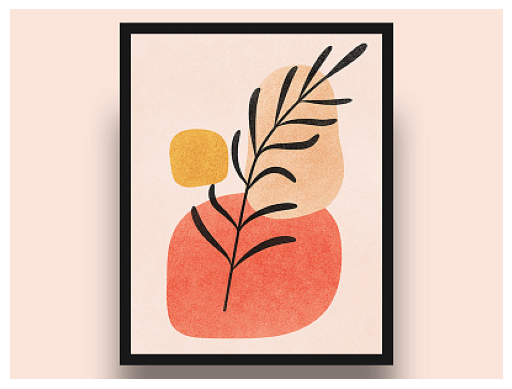

In [4]:
image = cv2.imread('./images/img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(image)

## 1. Image Blurring
Image blurring, also known as smoothing, is a technique used in image processing to reduce noise or detail in an image. It works by averaging the pixel values around a target pixel, resulting in a softened or smoothed appearance. This can help reduce sharp edges, small details, and high-frequency noise, making the image look more visually pleasant or preparing it for further processing like edge detection.

### i. Applying the Identity Kernel to an Image

(-0.5, 399.5, 299.5, -0.5)

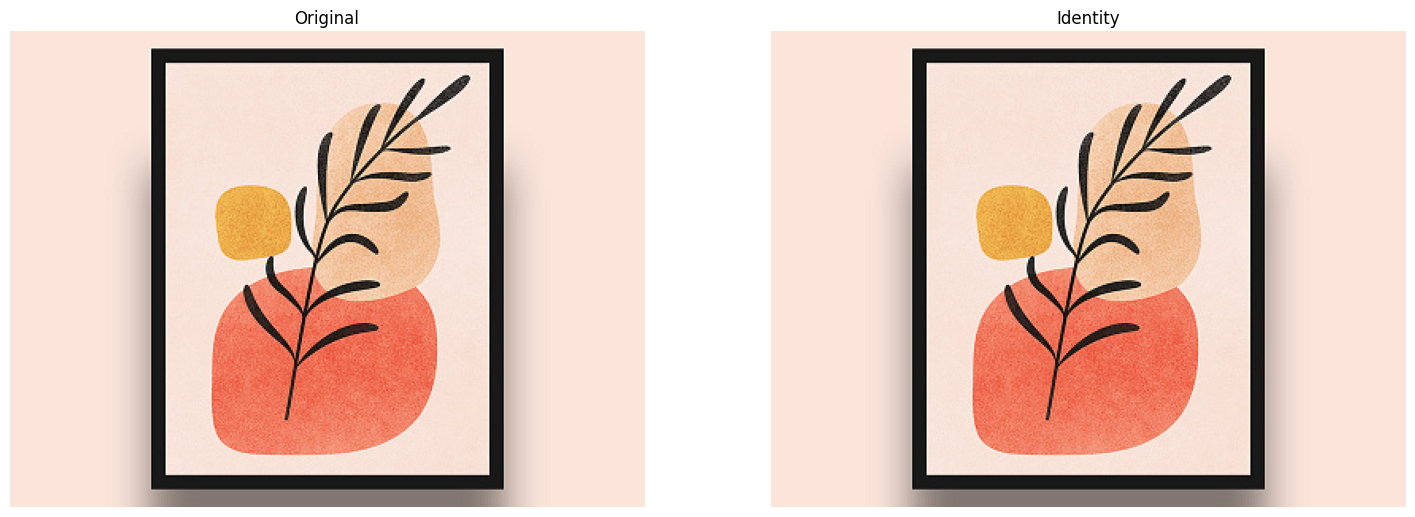

In [6]:
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original') 
plt.axis("off")

plt.subplot(122)
plt.imshow(identity)
plt.title('Identity')
plt.axis("off")

##

### ii. Applying Blurr Filter

(-0.5, 399.5, 299.5, -0.5)

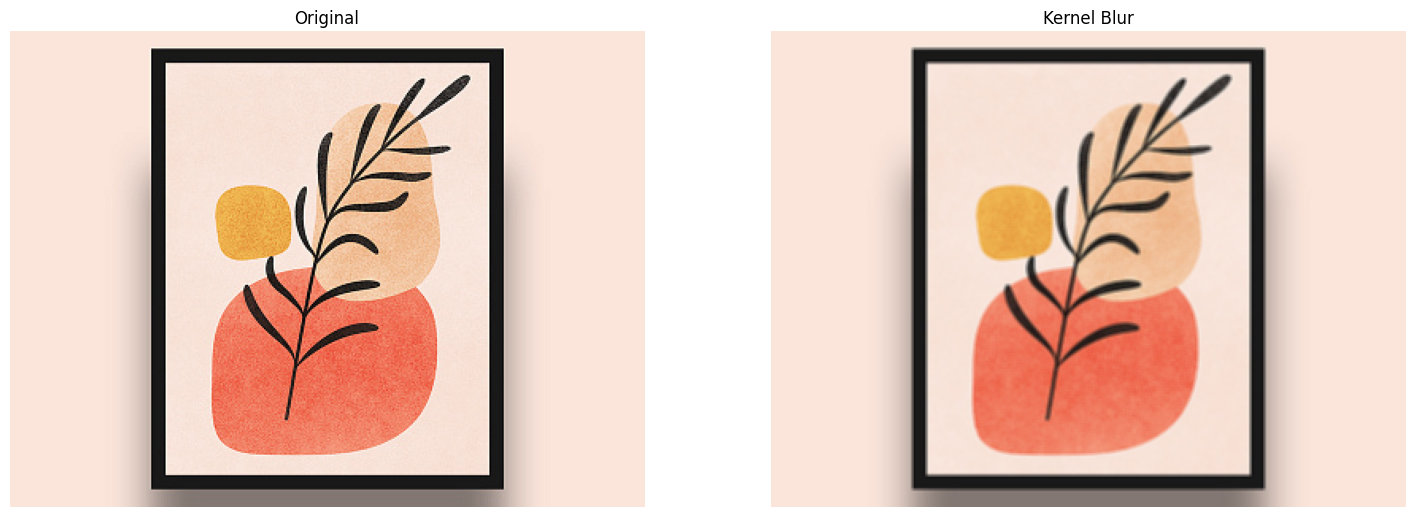

In [7]:
kernel = np.ones((3, 3), np.float32) / 9

img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original') 
plt.axis("off")

plt.subplot(122)
plt.imshow(img)
plt.title('Kernel Blur')
plt.axis("off")

OpenCV has provided blur() method to blur an image.

(-0.5, 399.5, 299.5, -0.5)

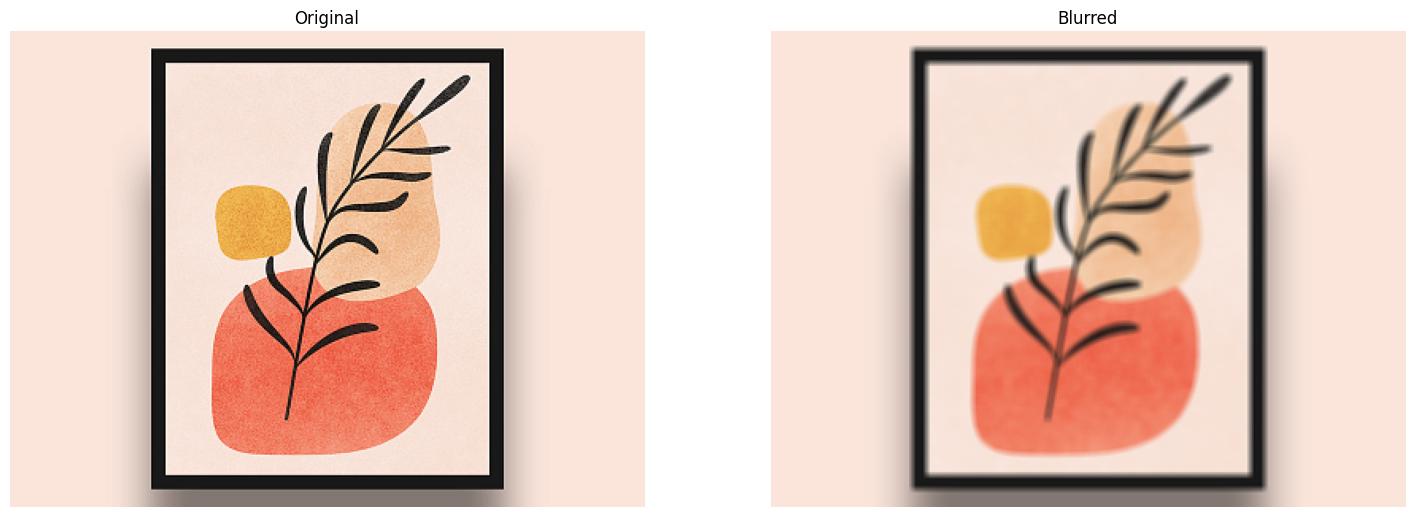

In [8]:
img_blur = cv2.blur(src=image, ksize=(5,5))

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(img_blur)
plt.title('Blurred')
plt.axis("off")

### iii. Gaussian Blur
In this type, the image is blurred and the contrast it reduced.

(-0.5, 399.5, 299.5, -0.5)

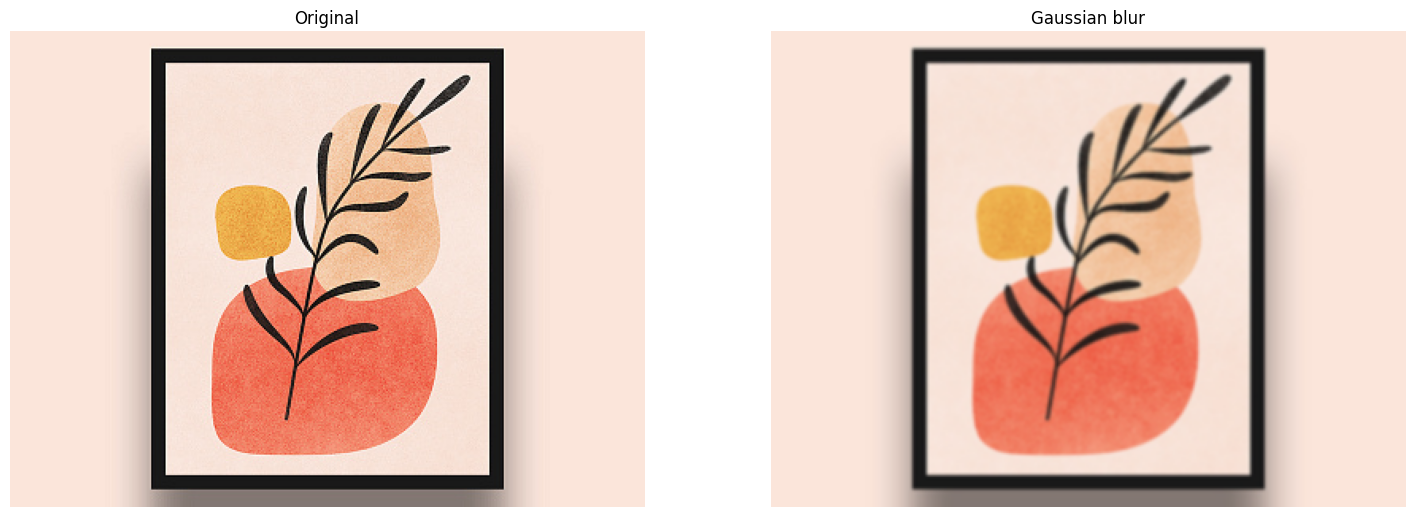

In [9]:
blur = cv2.GaussianBlur(src=image,ksize=(5,5),sigmaX=0)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(blur)
plt.title('Gaussian blur')
plt.axis("off")

### iv. Median Blur

It is similar to blurring using Kernal, the central element of an image is replaced by median of all pixels.

(-0.5, 399.5, 299.5, -0.5)

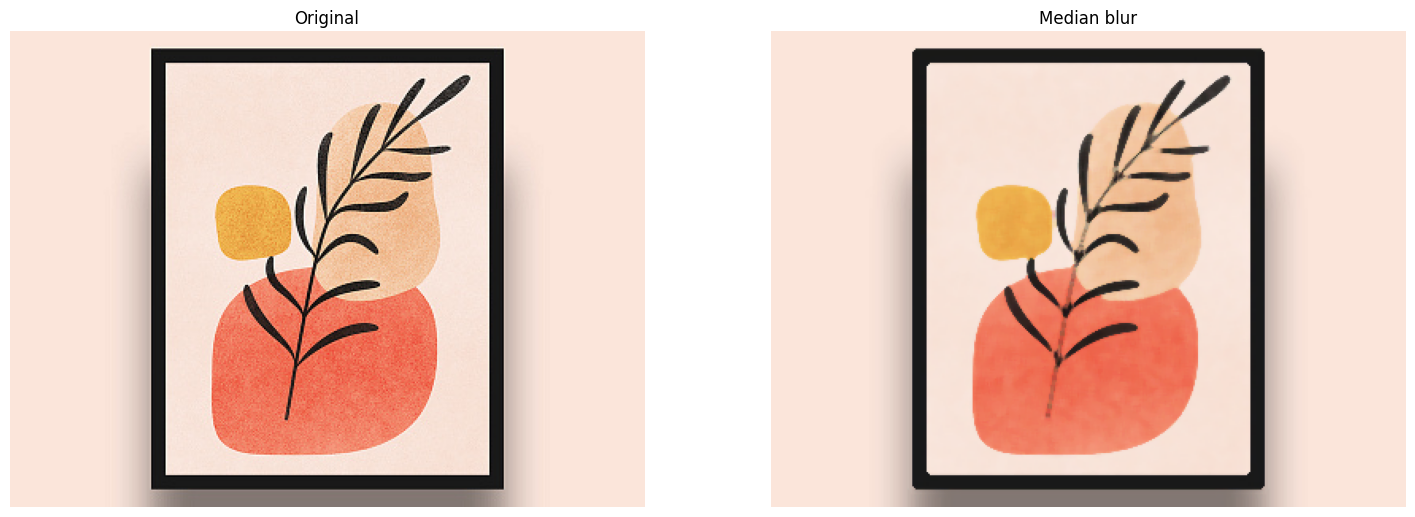

In [10]:
median = cv2.medianBlur(src=image, ksize=5)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(median)
plt.title('Median blur')
plt.axis("off")

## Image Sharpening
Image sharpening is a technique used in image processing to enhance the edges and fine details of an image, making it appear clearer and more defined. It works by amplifying high-frequency components, such as edges and textures, which are typically areas where there are rapid intensity changes in pixel values. This process helps to emphasize features like lines, edges, and small details, making the image appear crisper.

### i. Sharpen using Kernel

We replace the central element of a Image by an amplified version of the same. It has the same syntax is Blurring using Kernel, the only change is the Kernel used.

(-0.5, 399.5, 299.5, -0.5)

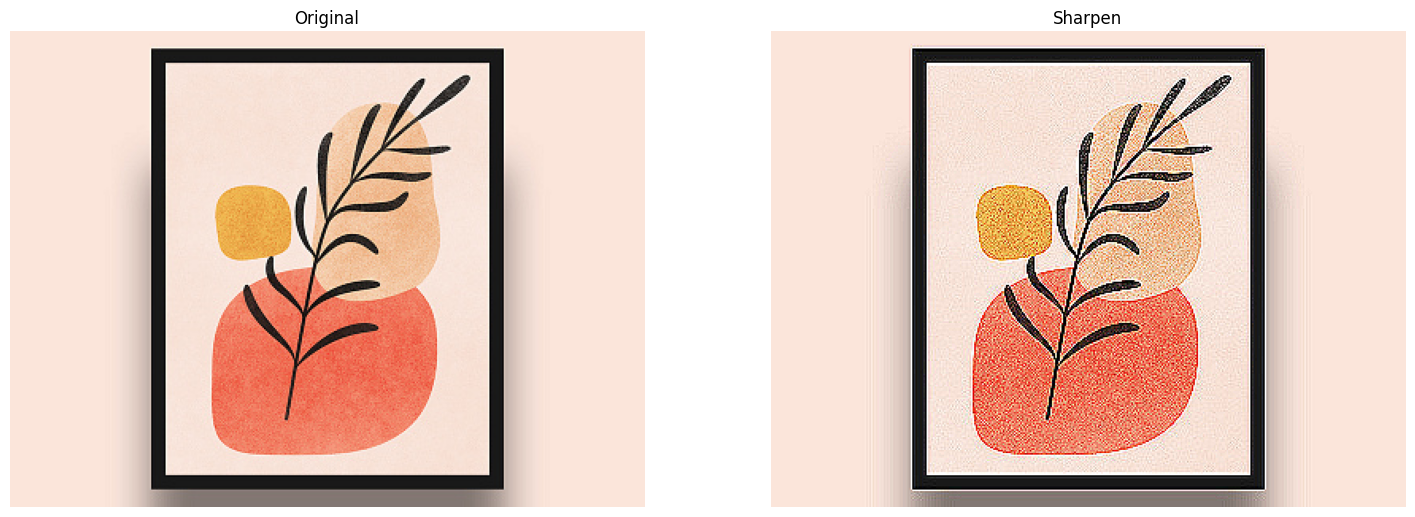

In [11]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(img)
plt.title('Sharpen')
plt.axis("off")

### ii. Bilateral Filtering
It is highly effective in noise removal while keeping edges sharp.

The syntax of this function is
dest = cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)

Where d is Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.

sigmaColor is used to filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.

sigmaSpace is used to Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.

(-0.5, 399.5, 299.5, -0.5)

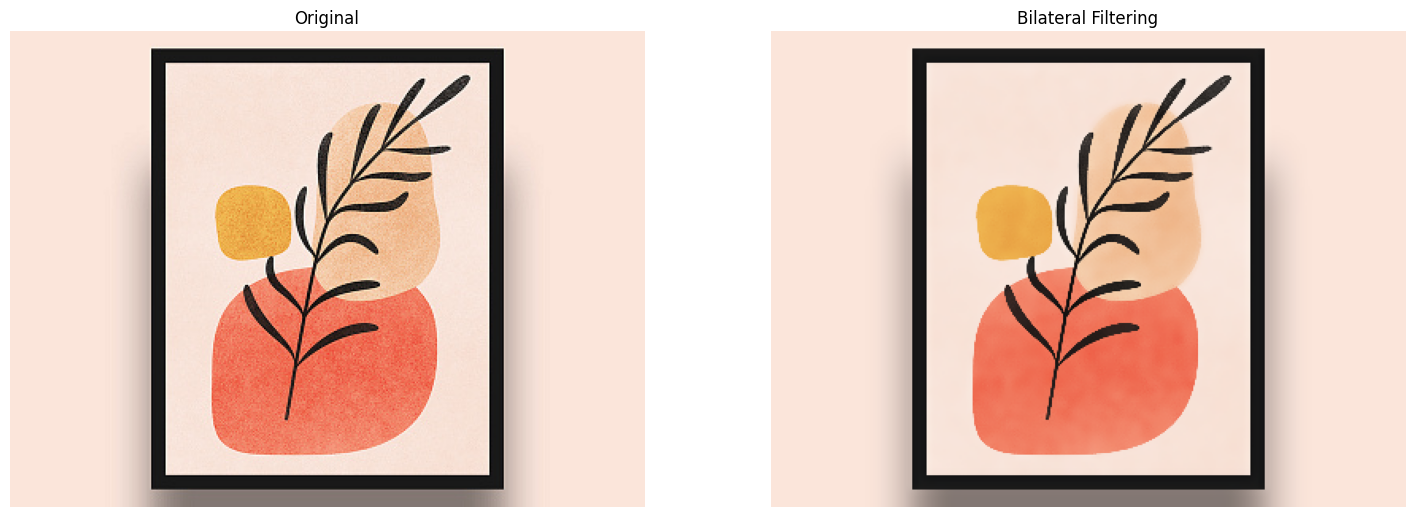

In [12]:
bf = cv2.bilateralFilter(src=image,d=9,sigmaColor=75,sigmaSpace=75)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(bf)
plt.title('Bilateral Filtering')
plt.axis("off")